In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [2]:
import os
import shutil
from sklearn.model_selection import train_test_split

def create_dir(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)

input_folder = '/kaggle/input/plantvillage-dataset/color'
output_folder = '/kaggle/working/plantvillage-dataset-split'

train_dir = os.path.join(output_folder, 'train')
val_dir = os.path.join(output_folder, 'val')
test_dir = os.path.join(output_folder, 'test')

create_dir(train_dir)
create_dir(val_dir)
create_dir(test_dir)
for class_name in os.listdir(input_folder):
    class_dir = os.path.join(input_folder, class_name)
    if os.path.isdir(class_dir):
        images = os.listdir(class_dir)
        train_images, temp_images = train_test_split(images, test_size=0.3, random_state=1337)
        val_images, test_images = train_test_split(temp_images, test_size=(1/3), random_state=1337) 
        
        create_dir(os.path.join(train_dir, class_name))
        create_dir(os.path.join(val_dir, class_name))
        create_dir(os.path.join(test_dir, class_name))
        
        for img in train_images:
            shutil.copy(os.path.join(class_dir, img), os.path.join(train_dir, class_name, img))
        for img in val_images:
            shutil.copy(os.path.join(class_dir, img), os.path.join(val_dir, class_name, img))
        for img in test_images:
            shutil.copy(os.path.join(class_dir, img), os.path.join(test_dir, class_name, img))


In [8]:
train_path='/kaggle/working/plantvillage-dataset-split/train'
val_path='/kaggle/working/plantvillage-dataset-split/val'
test_path='/kaggle/working/plantvillage-dataset-split/test'


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
image_gen =ImageDataGenerator(rotation_range=40,
                               width_shift_range=0.10,
                               height_shift_range=0.10,
                               rescale=1/255,
                               shear_range=0.1,
                               zoom_range=0.1,
                               horizontal_flip=True,
                               fill_mode='nearest'
                              )

In [11]:
val_test_gen=ImageDataGenerator(rescale=1/255)

In [12]:
val_data_gen = val_test_gen.flow_from_directory(
    val_path,
    target_size=(224,224),
    color_mode='rgb',
    batch_size=32,
    class_mode='categorical'
)

test_data_gen = val_test_gen.flow_from_directory(
    test_path,
    target_size=(224,224),
    color_mode='rgb',
    batch_size=32,
    class_mode='categorical'
)

Found 10859 images belonging to 38 classes.
Found 5448 images belonging to 38 classes.


In [13]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=(224,224),
                                                color_mode='rgb',
                                               batch_size=32,
                                               class_mode='categorical')

Found 37998 images belonging to 38 classes.


In [14]:
from tensorflow.keras.models import load_model

# # # #  **EfficientnetB0**

In [19]:
model=load_model('/kaggle/input/mod/tensorflow2/default/1/modeleff.h5')

In [26]:
val_loss, val_accuracy = model.evaluate(val_data_gen, steps=val_data_gen.samples // 32)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

339/339 ━━━━━━━━━━━━━━━━━━━━ 418s 1s/step - accuracy: 0.9865 - loss: 0.3241
Validation Accuracy: 98.43%


In [66]:
from sklearn.metrics import classification_report
import numpy as np

y_pred = model.predict(val_data_gen, steps=val_data_gen.samples // 32)

y_pred_classes = np.argmax(y_pred, axis=1)

y_true = val_data_gen.classes[:len(y_pred_classes)]



339/339 ━━━━━━━━━━━━━━━━━━━━ 402s 1s/step


In [69]:
print(classification_report(y_pred_classes,y_true))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       128
           1       0.98      0.98      0.98       124
           2       0.96      0.96      0.96        55
           3       0.99      0.99      0.99       331
           4       0.99      1.00      0.99       297
           5       1.00      1.00      1.00       209
           6       1.00      1.00      1.00       171
           7       1.00      0.86      0.93       118
           8       0.93      0.93      0.93       238
           9       0.92      1.00      0.96       181
          10       1.00      1.00      1.00       232
          11       0.98      1.00      0.99       232
          12       0.97      0.99      0.98       271
          13       1.00      0.94      0.97       228
          14       0.95      0.95      0.95        84
          15       1.00      1.00      1.00      1101
          16       0.99      1.00      0.99       459
          17       0.97    

In [15]:
from sklearn.metrics import classification_report


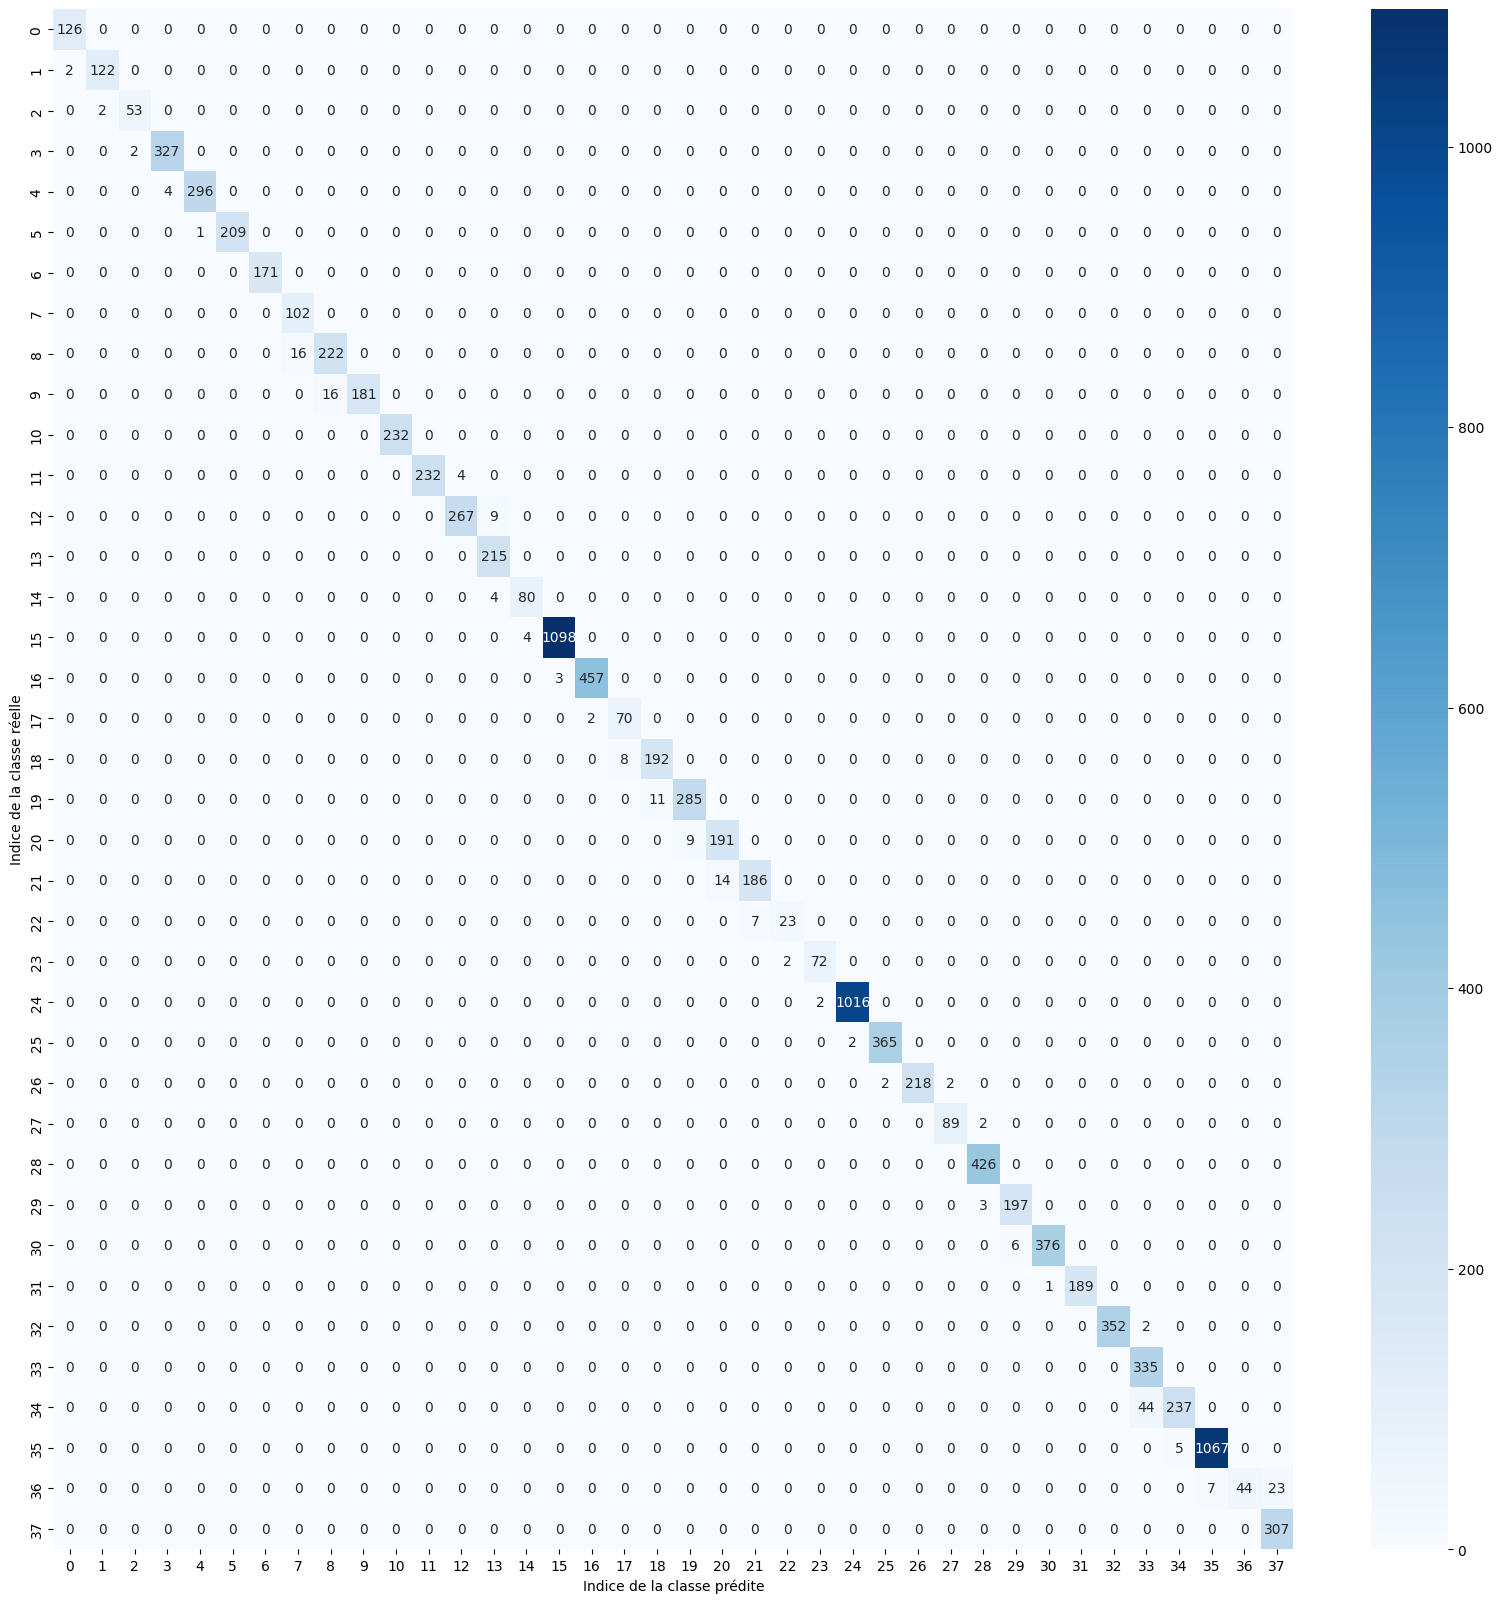

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(20,20)) 

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=True, yticklabels=True)

plt.xlabel('Indice de la classe prédite')
plt.ylabel('Indice de la classe réelle')

plt.show()


In [16]:
model2=load_model('/kaggle/input/mod/tensorflow2/default/1/modelmobilene.keras')

/opt/conda/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [17]:
val_loss, val_accuracy = model2.evaluate(val_data_gen, steps=val_data_gen.samples // 32)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  3/339 ━━━━━━━━━━━━━━━━━━━━ 17s 53ms/step - accuracy: 0.9097 - loss: 0.2315 

I0000 00:00:1727321529.248444     129 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1727321529.279226     129 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


339/339 ━━━━━━━━━━━━━━━━━━━━ 26s 46ms/step - accuracy: 0.9134 - loss: 0.2830
Validation Accuracy: 91.47%


In [19]:
from sklearn.metrics import classification_report
import numpy as np

y_pred = model2.predict(val_data_gen, steps=val_data_gen.samples // 32)

y_pred_classes = np.argmax(y_pred, axis=1)

y_true = val_data_gen.classes[:len(y_pred_classes)]



  4/339 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step

W0000 00:00:1727321597.561881     131 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


339/339 ━━━━━━━━━━━━━━━━━━━━ 19s 46ms/step


In [22]:
print(classification_report(y_pred_classes,y_true))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96       137
           1       0.91      0.93      0.92       122
           2       0.84      0.71      0.77        65
           3       0.94      0.91      0.92       342
           4       0.89      0.95      0.92       281
           5       0.94      0.98      0.96       202
           6       0.97      0.95      0.96       175
           7       0.91      0.63      0.75       147
           8       0.77      0.77      0.77       239
           9       0.72      0.91      0.80       156
          10       0.94      0.94      0.94       231
          11       0.81      1.00      0.89       191
          12       1.00      0.86      0.93       320
          13       0.94      0.93      0.94       218
          14       0.82      0.82      0.82        84
          15       0.99      0.99      0.99      1093
          16       0.95      1.00      0.98       438
          17       0.97    

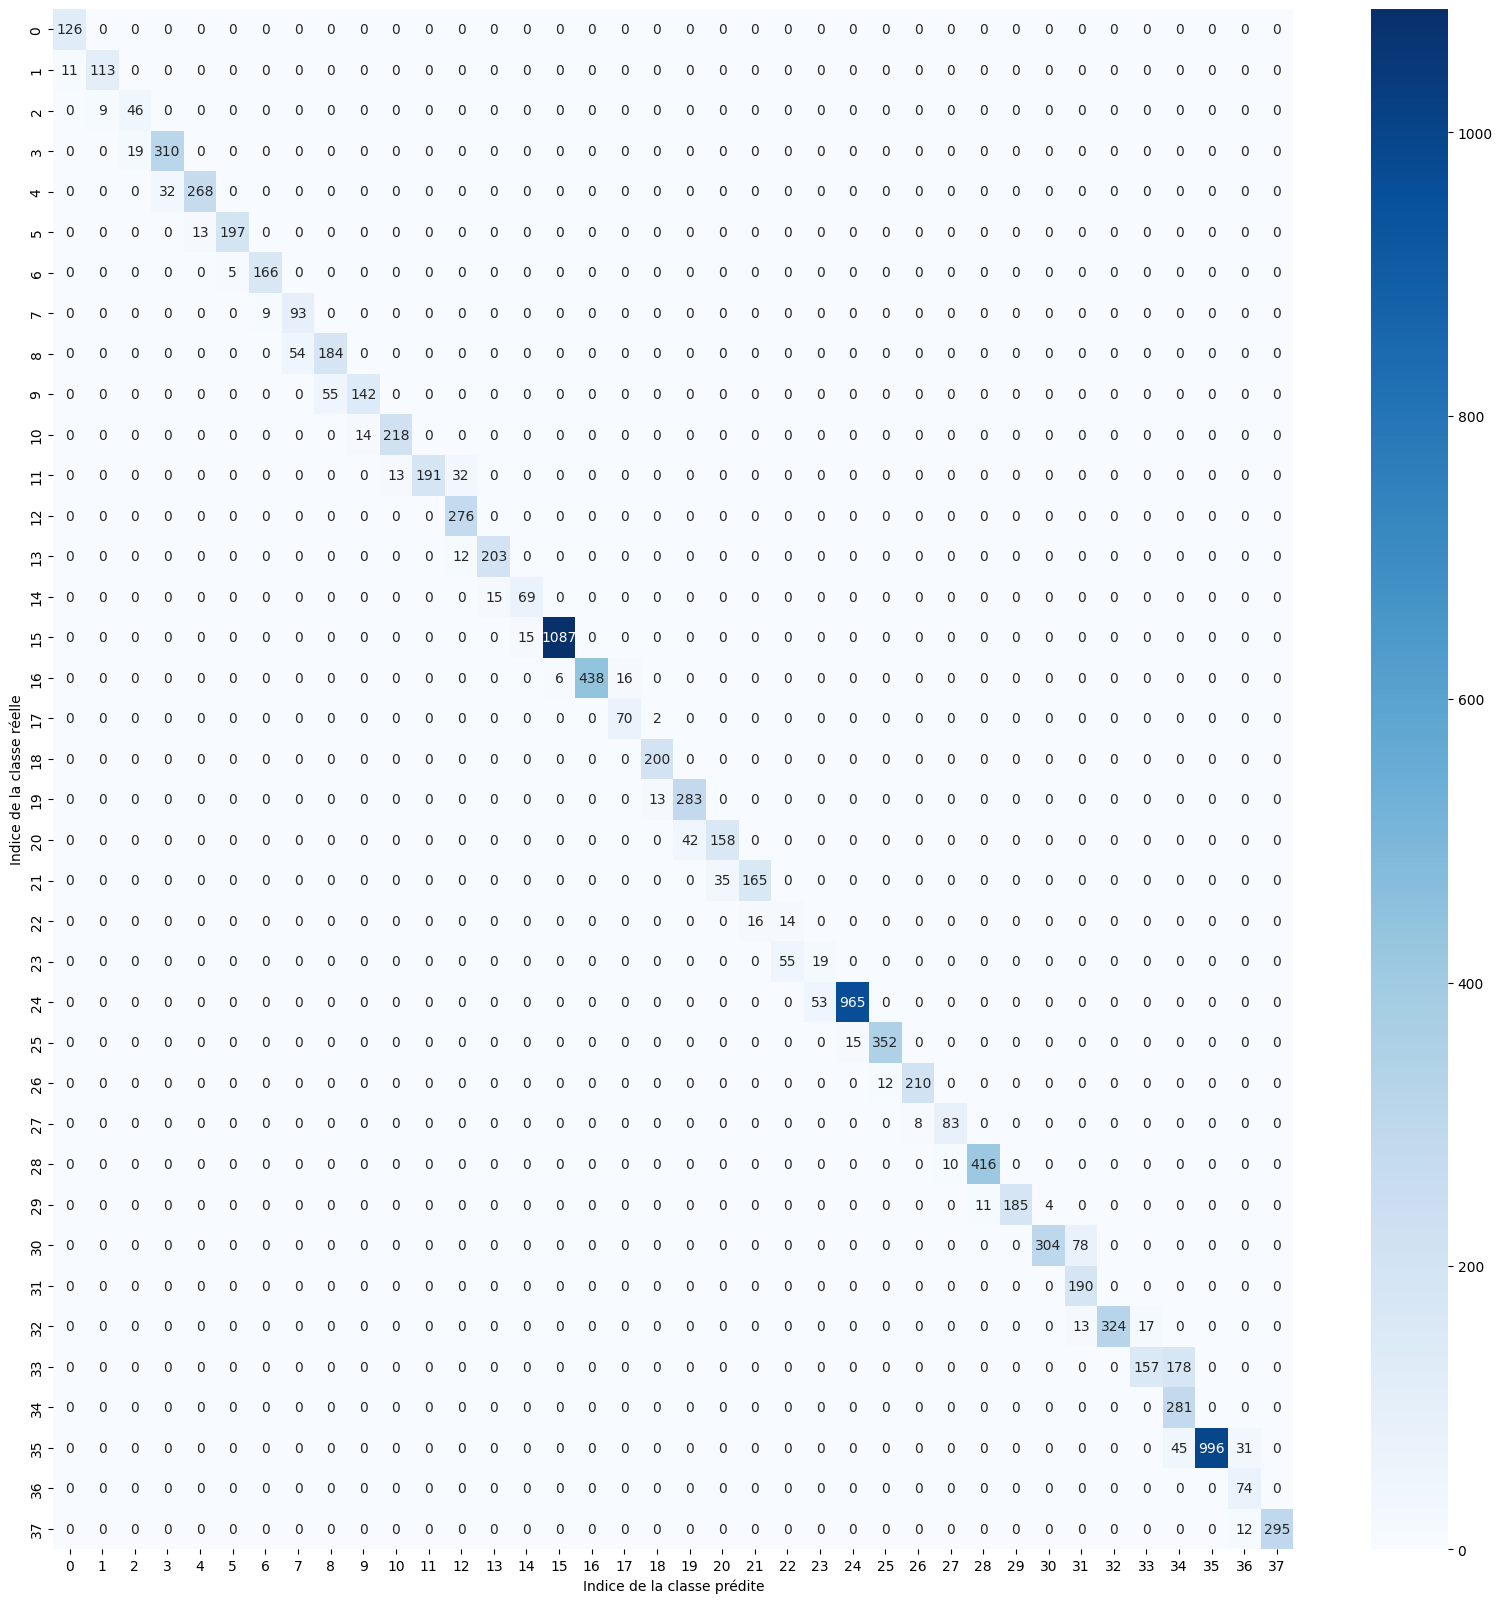

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(20,20)) 

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=True, yticklabels=True)

plt.xlabel('Indice de la classe prédite')
plt.ylabel('Indice de la classe réelle')

plt.show()
